---
MAT421 - Applied Computational Methods

Arizona State University

Homework #4

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 19 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 19. Root Finding
---

## 19.1 Root Finding Problem Statement

If $f(x)=0$ for some $x$, then $x$ is said to be a root, or zero, of the function $f(x)$. While the roots of some functions can be exactly calculated, others must be numerically approximated.

For instance, for a function such as $f(x)=ax^2+bx+c$ the roots can be exactly calculated using the quadratic formula, $x=\frac{-b±\sqrt{b^2-4ac}}{2a}$. However, for a function such as $f(x)=cos(x)-x$ there is no exact solution for the roots of the function.

Below are examples with Python scripts plotting the functions and roots.

### Example 1.

Find the roots for the function $f(x)=2x^2+3x+1$.

$x=\frac{-(3)±\sqrt{(3)^2-4(2)(1)}}{2(2)}=\frac{-3±1}{4}=-1,-\frac{1}{2}$

### Example 2.

Find the roots for the function $f(x)=x^2-16$.

$x=±\sqrt{16}=-4,4$

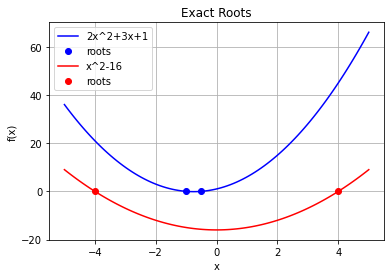

In [36]:
# import for linspace
import numpy as np
# import for plotting functions
import matplotlib.pyplot as plt


# create an input vector 
x = np.linspace(-5,5,100)

# function #1 2x^2+3x+1
f_1 = 2*x**2+3*x+1
# function #2 x^2-16
f_2 = x**2-16

# plot function #1 and it's roots
plt.plot(x,f_1,'b-',label='2x^2+3x+1')
plt.plot(-1,0,'bo',label='roots')
plt.plot(-1/2,0,'bo')

# plot function #2 and it's roots
plt.plot(x,f_2,'r-',label='x^2-16')
plt.plot(-4,0,'ro',label='roots')
plt.plot(4,0,'ro')

# title, label plot, add legend and add grid
plt.title('Exact Roots')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()

# show plot
plt.show()


### Example 3.

The function $f(x)=cos(x)-x$ can only have numerical approximated roots. For functions such as this, Python can be used to numerically approximate the roots of the function.

Below is a Python script solving for the roots.

Approximated Root:  [0.73908513]
f(x):  [0.]
Message:  The solution converged.


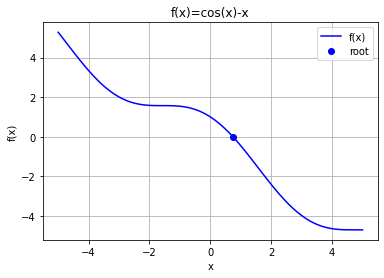

In [37]:
# import for fsolve
from scipy import optimize
# import for array functions
import numpy as np
# import for plotting functions
import matplotlib.pyplot as plt


# create an input vector 
x = np.linspace(-5,5,100)

# function cos(x)-x for plotting
f_3 = np.cos(x)-x

# python function cos(x)-x for fsolve
f = lambda x: np.cos(x) - x

# solve for root
root,info,ier,msg = optimize.fsolve(f,-2,full_output=True)

# print root, output f(x) and fsolve message
print('Approximated Root: ',root)
print('f(x): ',f(root))
print('Message: ',msg)

# plot function and it's root
plt.plot(x,f_3,'b-',label='f(x)')
plt.plot(root,f(root),'bo',label='root')

# title, label plot, add legend and add grid
plt.title('f(x)=cos(x)-x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()

# show plot
plt.show()


### Example 4.

The function $f(x)=\frac{1}{x}$ does not actually cross the x-axis and therefore does not have any roots. In this case, Python will not produce a correct result since Python will not converge to a solution for a root.

Below is a Python script solving for no roots.

Approximated Root:  [-3.52047359e+83]
f(x):  [-2.84052692e-84]
Message:  The number of calls to function has reached maxfev = 400.


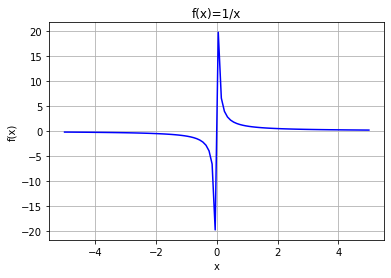

In [38]:
# import for fsolve
from scipy import optimize
# import for array functions
import numpy as np
# import for plotting functions
import matplotlib.pyplot as plt


# create an input vector 
x = np.linspace(-5,5,100)

# function 1/x for plotting
f_4 = 1/x

# python function 1/x for fsolve
f = lambda x: 1/x

# solve for root
root,info,ier,msg = optimize.fsolve(f,-2,full_output=True)

# print root, output f(x) and fsolve message
print('Approximated Root: ',root)
print('f(x): ',f(root))
print('Message: ',msg)

# plot function
plt.plot(x,f_4,'b-')

# title, label plot, and add grid
plt.title('f(x)=1/x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# show plot
plt.show()

## 19.2 Tolerance

Error and tolerance are used in order to determine if a numerical approximation converges on a solution for a root. Error is the amount a solution differs from the expected value. Tolerance is the level of acceptable error for a particular application. When a application has found a solution with an error less than the tolerance, it is said to have converged to a solution. 



## 19.3 Bisection Method

The bisection method makes use of the Intermediate Value Theorem in order to converge on a root.

**Intermediate Value Theorem**<br>
If $f(x)$ is a continous function between $a$ and $b$, and $sign(f(a))\neq{sign(f(b))}$, then there must be a $c$, such that $a<{c}<{b}$ and $f(c)=0$.

For example, looking at the graph in example 3 for $f(x)=cos(x)-x$ a root can be found between $x=0$ and $x=2$. At $f(0)$ the function is positive and at $f(2)$ the function is negative, thus per the Intermediate Value Theorem there will exist a $c$ such that $0<{c}<{2}$ and $f(c)=0$. In this case $c=0.73908513$.

The bisection method utilizes an recursive process to find roots. Starting with an $a$ and $b$ such that:
- $a<{b}$
- $f(a)>0$
- $f(b)<{0}$

Then there must be a root on the interval $(a,b)$. The method first evaluates the midpoint between $a$ and $b$, $m=\frac{a+b}{2}$. If $f(m)=0$, or is close enough i.e. $|f(m)|<{tolerance}$, then $m$ is the root. If $m$ is not a root than $m$ becomes a bound on the open interval $(a,b)$ and the process is repeated until the convergence on a root. If $f(m)>0$ than $m$ replaces $a$ in $(m,b)$. If $f(m)<{0}$ than $m$ replaces $b$ in $(a,m)$.

Below is a Python script demostrating the bisection method.

In [39]:
# import for array functions
import numpy as np


# function for bisection method
def bisection_method(f,a,b,tol):

  # check if Intermediate Value Theorem is valid
  if np.sign(f(a)) == np.sign(f(b)):
    return 'There is no root between a and b'
  
  # calculate midpoint
  m = (a+b)/2

  # check if midpoint is a root
  if np.abs(f(m))<tol:
    return m

  # change interval from (a,b) to (m,b) and redo
  elif np.sign(f(a))==np.sign(f(m)):
    return bisection_method(f,m,b,tol)

  # change interval from (a,b) to (b,m) and redo
  elif np.sign(f(b))==np.sign(f(m)):
    return bisection_method(f,a,m,tol)

##### Main #####

# python function cos(x)-x
f = lambda x: np.cos(x)-x

# solve for root
root = bisection_method(f,0,2,0.001)

# print root and output f(x)
print('For f(x)=cos(x)-x')
print('Approximated Root: ',root)
print('f(x): ',f(root))

# python function 1/x
f = lambda x: 1/x

# solve for root
root = bisection_method(f,1,2,0.001)

# print root
print('\nFor f(x)=1/x')
print('Approximated Root: ',root)


For f(x)=cos(x)-x
Approximated Root:  0.7392578125
f(x):  -0.0002890091467900868

For f(x)=1/x
Approximated Root:  There is no root between a and b


## 19.4 Newton-Raphson Method

The Newton-Raphson method uses recursive linear approximations in order to converge to a root of the function, $f(x)$. The method starts with an initial guess $x_0$ that is not a root. A linear approximation is made at $x_0$ using the intersection of the x-axis with the tagent line formed by the slope $f'(x_0)$. As a result, the function, $f(x)$, must have a derivative.  The intersection at $x_1$ where $f(x_1)=0$, is the next "guess". This is referred to as the Newton Step. The process continues until a root is reached.

Using the equation of a line,

$0=f(x_0)+f'(x_0)(x_1-x_0)$

The next guess is then,

$x_1=x_0-\frac{f(x_0)}{f'(x_0}$

This method can converge to a root much faster than the bisection method, however, it has the following downsides:

- The initial guess, $x_0$, may not be close to the root
- The Newton Step may be very large and diverge away from a root
- The method may converge to a different unexpected root based on the function and it's derivative
- Derivative must be known

Below is a Python script demostrating the Newton-Raphson method.


In [40]:
# import for cos and sin
import numpy as np

# function for Newton-Raphson Method
def newton_raphson_method(f,df,x0,tol):
  
  # check if guess is root
  if abs(f(x0))<tol:
    return x0
  
  # determine next guess and redo
  else:
    x1 = x0 - f(x0)/df(x0)
    return newton_raphson_method(f,df,x1,tol)

##### Main #####

# python function for cos(x)-x
f = lambda x: np.cos(x)-x

# python function for derivative of cos(x)-x
df = lambda x: -np.sin(x)-1

# solve for root
root = newton_raphson_method(f,df,0,0.001)

# print root and output f(x)
print('For f(x)=cos(x)-x')
print('Approximated Root: ',root)
print('f(x): ',f(root))


For f(x)=cos(x)-x
Approximated Root:  0.7391128909113617
f(x):  -4.6455898990771516e-05


## 19.5 Finding Roots in Python

Python has a rooting finding function called fsolve from the scipy.optimize library. When using this function, $f(x)$ must be a Python function created with either def or use of lambda. $f(x)$ can then be passed as an argument to fsolve. fsolve is optimized for speed and accuracy.

Below is a Python script demostrating the use of fsolve for the function from examples 1 and 2 above.

In [41]:
# import for fsolve
from scipy.optimize import fsolve

# python function 2x^2+3x+1 using def
def f_1(x):
  return 2*x**2+3*x+1

# python function x^2-16 using lambda
f_2 = lambda x: x**2-16

# solve for roots of 2x^2+3x+1
roots_1 = fsolve(f_1,[-2,0])

# solve for roots of x^2-16
roots_2 = fsolve(f_2,[-5,5])

# print roots
print('For 2x^2+3x+1')
print('Approximated Roots: ', roots_1)

# print roots 
print('\nFor x^2-16')
print('Approximated Roots: ', roots_2)



For 2x^2+3x+1
Approximated Roots:  [-1.  -0.5]

For x^2-16
Approximated Roots:  [-4.  4.]
